In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
from osu_util import read_osu_log, read_osu_log_multi, plot_osu

In [3]:
ls osu_log_pleiades/bcast/

N12n288/  N1n24/    N24n576/  N3n72/    N48n1152/ N6n144/


In [4]:
ls osu_log_pleiades/allreduce/

N12n288/  N1n24/    N24n576/  N3n72/    N48n1152/ N6n144/


In [5]:
ls ./osu_log_pleiades/bcast/N1n24/ #bcast.log

run1/ run2/ run3/ run4/ run5/


In [6]:
def read_pleiades_scaling(suffix, prefix='./osu_log_pleiades/bcast/'):
    N_list = [1, 3, 6, 12, 24, 48]

    file_list = [prefix + 'N{0}n{1}'.format(N, N*24) + suffix for N in N_list]
    # print(file_list)
    
    df = read_osu_log_multi(file_list, [N*24 for N in N_list])
    return df

In [7]:
df_bcast = read_pleiades_scaling('/run3/bcast.log')
df_bcast

,24,72,144,288,576,1152
size,,,,,,
1,1.09,3.42,4.31,10.17,12.95,16.19
2,1.09,3.37,4.22,10.90,20.07,20.69
4,1.08,2.99,4.27,8.96,17.16,13.42
8,1.10,2.78,4.25,9.60,15.86,20.23
16,1.10,3.20,4.40,8.50,16.89,19.96
32,1.10,3.11,4.44,13.51,9.14,16.18
64,1.51,5.01,4.62,11.75,16.16,23.22
128,1.73,4.12,5.90,9.95,12.27,19.45
256,1.88,4.23,6.74,14.01,16.30,13.50


In [8]:
df_allreduce = read_pleiades_scaling('/run3/allreduce.log', prefix='./osu_log_pleiades/allreduce/')
df_allreduce

,24,72,144,288,576,1152
size,,,,,,
4,2.91,8.66,10.47,21.26,48.29,51.88
8,2.68,7.37,15.90,28.56,34.90,55.56
16,2.65,7.31,9.52,23.82,30.38,64.90
32,3.68,8.55,10.80,25.69,59.44,60.74
64,3.62,9.43,12.89,28.22,44.61,48.06
128,4.65,11.13,16.02,27.22,48.24,65.74
256,4.89,11.80,14.44,41.57,37.31,61.71
512,5.38,12.09,15.21,44.26,58.89,65.61
1024,7.00,14.18,17.41,37.50,44.28,71.44


# Plot

Text(0.5, 1.0, 'MPI_Bcast scaling with message size = 1048576')

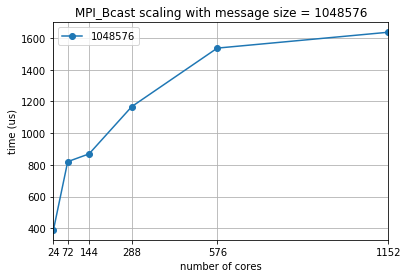

In [9]:
# message = 65536
message = 1048576

df_bcast.loc[message].plot(marker='o', grid=True)
    
plt.xticks(df_bcast.columns)
plt.ylabel('time (us)')
plt.xlabel('number of cores')

plt.legend()

plt.title('MPI_Bcast scaling with message size = {}'.format(message))

Text(0.5, 1.0, 'MPI_Allreduce scaling with message size = 1048576')

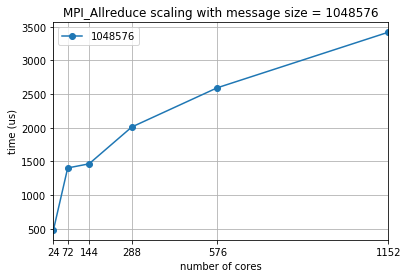

In [10]:
# message = 65536
message = 1048576

df_allreduce.loc[message].plot(marker='o', grid=True)
    
plt.xticks(df_bcast.columns)
plt.ylabel('time (us)')
plt.xlabel('number of cores')

plt.legend()

plt.title('MPI_Allreduce scaling with message size = {}'.format(message))